**Membuat tiga dataset dengan pola yang berbeda**

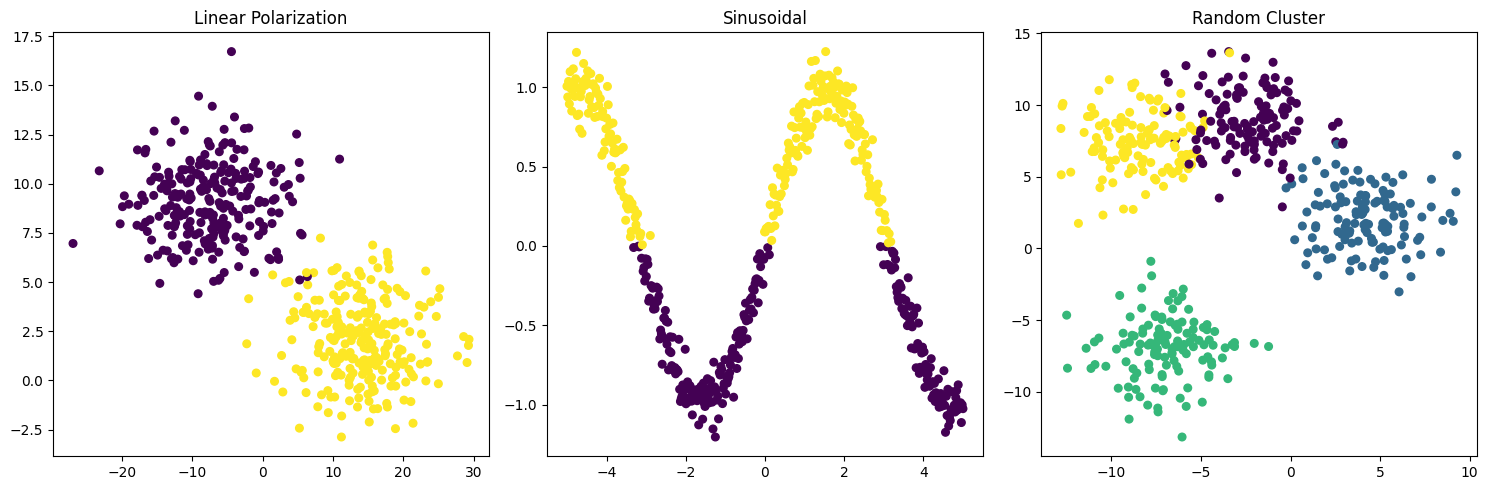

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Pola Polarisasi Linear: Dataset dengan dua kelas yang terpisah di sepanjang sumbu x
# make_blobs digunakan untuk membuat dataset dengan dua cluster (centers=2) dan standar deviasi (cluster_std=2.0)
X_linear, y_linear = make_blobs(n_samples=500, centers=2, random_state=42, cluster_std=2.0)
X_linear[:, 0] *= 3  # Memperbesar jarak antar kelas sepanjang sumbu x dengan mengalikan koordinat x dengan 3

# Pola Sinusoidal: Membuat dataset dengan pola sinusoidal
x_sin = np.linspace(-5, 5, 500)  # Membuat 500 titik dari -5 hingga 5 pada sumbu x
y_sin = np.sin(x_sin) + 0.1 * np.random.randn(500)  # Menghitung nilai sinus pada x dan menambahkan noise
X_sin = np.column_stack((x_sin, y_sin))  # Menggabungkan x dan y menjadi satu array X
y_sin = np.array([0 if y < 0 else 1 for y in y_sin])  # Membagi dataset menjadi dua kelas berdasarkan nilai sinus,
# kelas 0 untuk nilai sinus di bawah sumbu x dan kelas 1 untuk nilai sinus di atas sumbu x

# Pola Random Cluster dengan Pusat yang Dekat: Membuat dataset dengan beberapa cluster yang lebih tersebar
X_random, y_random = make_blobs(n_samples=500, centers=4, random_state=42, cluster_std=0.5)  # Membuat 4 cluster dengan standar deviasi kecil
X_random[:, 0] += np.random.randn(500) * 2  # Menambahkan gangguan acak pada koordinat x untuk membuat variasi
X_random[:, 1] += np.random.randn(500) * 2  # Menambahkan gangguan acak pada koordinat y untuk membuat variasi

# Plot dataset yang telah dibuat
datasets = [(X_linear, y_linear), (X_sin, y_sin), (X_random, y_random)]  # Menyimpan dataset dalam sebuah list
titles = ['Linear Polarization', 'Sinusoidal', 'Random Cluster']  # Menentukan judul untuk masing-masing plot

# Menyiapkan visualisasi dengan ukuran yang lebih besar
plt.figure(figsize=(15, 5))  # Ukuran figure disesuaikan agar lebih nyaman dilihat

# Loop untuk membuat subplot bagi setiap dataset
for i, (X, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)  # Membuat 1 baris dan 3 kolom subplot, posisi plot ke-i
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=30)  # Menampilkan plot scatter dengan warna berdasarkan kelas y
    plt.title(titles[i])  # Menampilkan judul pada setiap subplot sesuai dengan dataset

plt.tight_layout()  # Mengatur tata letak agar tidak ada overlap antara plot
plt.show()  # Menampilkan hasil plot


**Membagi dataset menjadi data pelatihan (training) dan pengujian (testing) dan kemudian memvisualisasikan hasil pembagian dataset tersebut dalam bentuk plot.**

Linear Dataset - Training set: (400, 2), Testing set: (100, 2)
Sinusoidal Dataset - Training set: (400, 2), Testing set: (100, 2)
Random Cluster Dataset - Training set: (400, 2), Testing set: (100, 2)


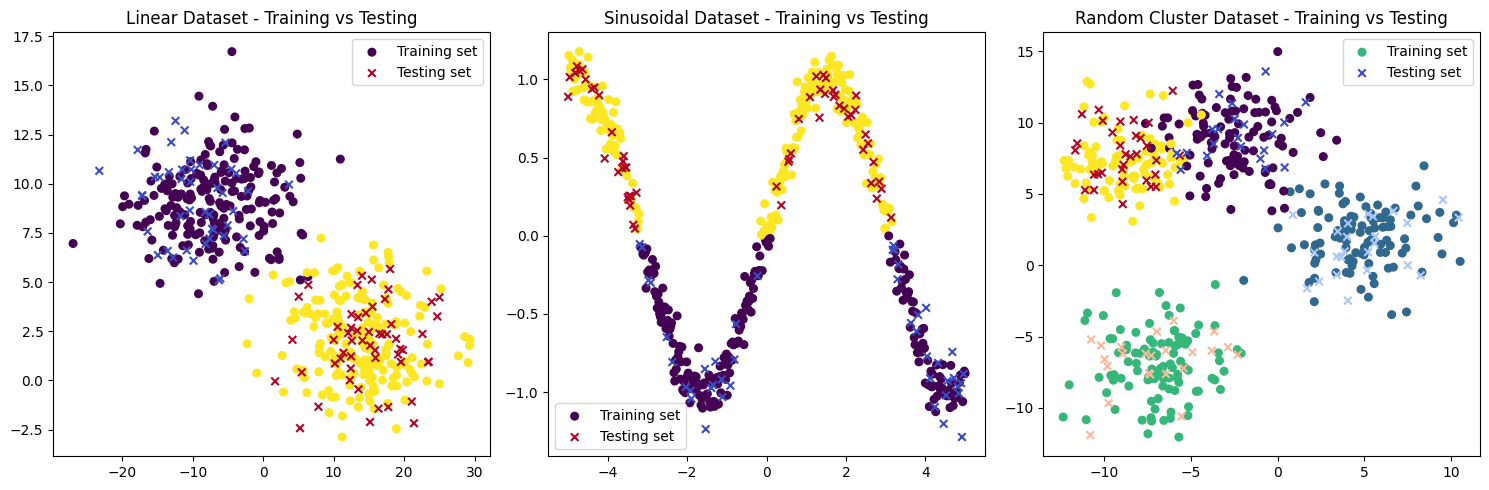

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split  # Import train_test_split

# Pola Polarisasi Linear
X_linear, y_linear = make_blobs(n_samples=500, centers=2, random_state=42, cluster_std=2.0)
X_linear[:, 0] *= 3  # Memperbesar jarak antar kelas sepanjang sumbu x

# Pola Sinusoidal
x_sin = np.linspace(-5, 5, 500)
y_sin = np.sin(x_sin) + 0.1 * np.random.randn(500)
X_sin = np.column_stack((x_sin, y_sin))
y_sin = np.array([0 if y < 0 else 1 for y in y_sin])

# Pola Random Cluster dengan Pusat yang Dekat
X_random, y_random = make_blobs(n_samples=500, centers=4, random_state=42, cluster_std=0.5)
X_random[:, 0] += np.random.randn(500) * 2
X_random[:, 1] += np.random.randn(500) * 2

# Membagi dataset menjadi training dan testing set
# Untuk masing-masing dataset, kita akan membaginya 80% untuk training dan 20% untuk testing
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)
X_train_sin, X_test_sin, y_train_sin, y_test_sin = train_test_split(X_sin, y_sin, test_size=0.2, random_state=42)
X_train_random, X_test_random, y_train_random, y_test_random = train_test_split(X_random, y_random, test_size=0.2, random_state=42)

# Menampilkan hasil pembagian dataset untuk memastikan ukuran data training dan testing
print(f"Linear Dataset - Training set: {X_train_linear.shape}, Testing set: {X_test_linear.shape}")
print(f"Sinusoidal Dataset - Training set: {X_train_sin.shape}, Testing set: {X_test_sin.shape}")
print(f"Random Cluster Dataset - Training set: {X_train_random.shape}, Testing set: {X_test_random.shape}")

# Plot dataset yang telah dibagi menjadi training dan testing set
# Visualisasi untuk dataset linear
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(X_train_linear[:, 0], X_train_linear[:, 1], c=y_train_linear, cmap='viridis', s=30, label='Training set')
plt.scatter(X_test_linear[:, 0], X_test_linear[:, 1], c=y_test_linear, cmap='coolwarm', s=30, label='Testing set', marker='x')
plt.title('Linear Dataset - Training vs Testing')
plt.legend()

# Visualisasi untuk dataset sinusoidal
plt.subplot(1, 3, 2)
plt.scatter(X_train_sin[:, 0], X_train_sin[:, 1], c=y_train_sin, cmap='viridis', s=30, label='Training set')
plt.scatter(X_test_sin[:, 0], X_test_sin[:, 1], c=y_test_sin, cmap='coolwarm', s=30, label='Testing set', marker='x')
plt.title('Sinusoidal Dataset - Training vs Testing')
plt.legend()

# Visualisasi untuk dataset random cluster
plt.subplot(1, 3, 3)
plt.scatter(X_train_random[:, 0], X_train_random[:, 1], c=y_train_random, cmap='viridis', s=30, label='Training set')
plt.scatter(X_test_random[:, 0], X_test_random[:, 1], c=y_test_random, cmap='coolwarm', s=30, label='Testing set', marker='x')
plt.title('Random Cluster Dataset - Training vs Testing')
plt.legend()

plt.tight_layout()  # Mengatur tata letak plot agar tidak tumpang tindih
plt.show()


**Menggunakan empat algoritma machine learning (SVM, Decision Tree, Random Forest, dan XGBoost) untuk melakukan klasifikasi pada tiga dataset yang berbeda: Linear, Sinusoidal, dan Random Cluster.**

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  # Support Vector Machine
from sklearn.tree import DecisionTreeClassifier  # Decision Tree
from sklearn.ensemble import RandomForestClassifier  # Random Forest
import xgboost as xgb  # XGBoost
from sklearn.metrics import accuracy_score  # Untuk menghitung accuracy

# Pola Polarisasi Linear
X_linear, y_linear = make_blobs(n_samples=500, centers=2, random_state=42, cluster_std=2.0)
X_linear[:, 0] *= 3  # Memperbesar jarak antar kelas sepanjang sumbu x

# Pola Sinusoidal
x_sin = np.linspace(-5, 5, 500)
y_sin = np.sin(x_sin) + 0.1 * np.random.randn(500)
X_sin = np.column_stack((x_sin, y_sin))
y_sin = np.array([0 if y < 0 else 1 for y in y_sin])

# Pola Random Cluster dengan Pusat yang Dekat
X_random, y_random = make_blobs(n_samples=500, centers=4, random_state=42, cluster_std=0.5)
X_random[:, 0] += np.random.randn(500) * 2
X_random[:, 1] += np.random.randn(500) * 2

# Membagi dataset menjadi training dan testing set
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)
X_train_sin, X_test_sin, y_train_sin, y_test_sin = train_test_split(X_sin, y_sin, test_size=0.2, random_state=42)
X_train_random, X_test_random, y_train_random, y_test_random = train_test_split(X_random, y_random, test_size=0.2, random_state=42)

# Fungsi untuk membuat dan mengevaluasi model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Melatih model dengan data training
    model.fit(X_train, y_train)

    # Melakukan prediksi pada data testing
    y_pred = model.predict(X_test)

    # Menghitung akurasi model
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Membuat model untuk masing-masing algoritma

# 1. SVM (Support Vector Machine)
svm_model = SVC(random_state=42)

# 2. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# 3. Random Forest
rf_model = RandomForestClassifier(random_state=42)

# 4. XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)

# Evaluasi model untuk setiap dataset

# Linear dataset
print("\nEvaluasi Model pada Linear Dataset:")
svm_acc_linear = evaluate_model(svm_model, X_train_linear, X_test_linear, y_train_linear, y_test_linear)
dt_acc_linear = evaluate_model(dt_model, X_train_linear, X_test_linear, y_train_linear, y_test_linear)
rf_acc_linear = evaluate_model(rf_model, X_train_linear, X_test_linear, y_train_linear, y_test_linear)
xgb_acc_linear = evaluate_model(xgb_model, X_train_linear, X_test_linear, y_train_linear, y_test_linear)

print(f"SVM Accuracy: {svm_acc_linear:.4f}")
print(f"Decision Tree Accuracy: {dt_acc_linear:.4f}")
print(f"Random Forest Accuracy: {rf_acc_linear:.4f}")
print(f"XGBoost Accuracy: {xgb_acc_linear:.4f}")

# Sinusoidal dataset
print("\nEvaluasi Model pada Sinusoidal Dataset:")
svm_acc_sin = evaluate_model(svm_model, X_train_sin, X_test_sin, y_train_sin, y_test_sin)
dt_acc_sin = evaluate_model(dt_model, X_train_sin, X_test_sin, y_train_sin, y_test_sin)
rf_acc_sin = evaluate_model(rf_model, X_train_sin, X_test_sin, y_train_sin, y_test_sin)
xgb_acc_sin = evaluate_model(xgb_model, X_train_sin, X_test_sin, y_train_sin, y_test_sin)

print(f"SVM Accuracy: {svm_acc_sin:.4f}")
print(f"Decision Tree Accuracy: {dt_acc_sin:.4f}")
print(f"Random Forest Accuracy: {rf_acc_sin:.4f}")
print(f"XGBoost Accuracy: {xgb_acc_sin:.4f}")

# Random Cluster dataset
print("\nEvaluasi Model pada Random Cluster Dataset:")
svm_acc_random = evaluate_model(svm_model, X_train_random, X_test_random, y_train_random, y_test_random)
dt_acc_random = evaluate_model(dt_model, X_train_random, X_test_random, y_train_random, y_test_random)
rf_acc_random = evaluate_model(rf_model, X_train_random, X_test_random, y_train_random, y_test_random)
xgb_acc_random = evaluate_model(xgb_model, X_train_random, X_test_random, y_train_random, y_test_random)

print(f"SVM Accuracy: {svm_acc_random:.4f}")
print(f"Decision Tree Accuracy: {dt_acc_random:.4f}")
print(f"Random Forest Accuracy: {rf_acc_random:.4f}")
print(f"XGBoost Accuracy: {xgb_acc_random:.4f}")



Evaluasi Model pada Linear Dataset:
SVM Accuracy: 1.0000
Decision Tree Accuracy: 0.9900
Random Forest Accuracy: 1.0000
XGBoost Accuracy: 1.0000

Evaluasi Model pada Sinusoidal Dataset:
SVM Accuracy: 1.0000
Decision Tree Accuracy: 1.0000
Random Forest Accuracy: 1.0000
XGBoost Accuracy: 1.0000

Evaluasi Model pada Random Cluster Dataset:
SVM Accuracy: 0.9500
Decision Tree Accuracy: 0.8900
Random Forest Accuracy: 0.9400
XGBoost Accuracy: 0.9200


Hasil evaluasi menunjukkan bahwa kinerja model machine learning sangat dipengaruhi oleh kompleksitas data, dengan SVM, Random Forest, dan XGBoost umumnya lebih baik pada data kompleks dibandingkan Decision Tree.

**Menggunakan PyTorch untuk membangun dan melatih Neural Network (NN)**

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Membuat dataset dengan pola Linear
X_linear, y_linear = make_blobs(n_samples=500, centers=2, random_state=42, cluster_std=2.0)
X_linear[:, 0] *= 3  # Memperbesar jarak antar kelas sepanjang sumbu x

# Membagi dataset menjadi training dan testing set
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)

# Mengonversi dataset menjadi tensor
X_train_tensor = torch.tensor(X_train_linear, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_linear, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_linear, dtype=torch.long)
y_test_tensor = torch.tensor(y_test_linear, dtype=torch.long)

# Membuat model Neural Network menggunakan PyTorch
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # Definisikan lapisan-lapisan jaringan neural
        self.fc1 = nn.Linear(2, 64)  # Layer input (2 fitur ke 64 neuron)
        self.fc2 = nn.Linear(64, 32)  # Layer tersembunyi (64 neuron ke 32 neuron)
        self.fc3 = nn.Linear(32, 2)   # Layer output (32 neuron ke 2 kelas)
        self.relu = nn.ReLU()         # Fungsi aktivasi ReLU

    def forward(self, x):
        # Forward pass melalui jaringan
        x = self.relu(self.fc1(x))  # Aktivasi di lapisan pertama
        x = self.relu(self.fc2(x))  # Aktivasi di lapisan kedua
        x = self.fc3(x)             # Output layer (tanpa aktivasi karena CrossEntropyLoss sudah menangani softmax)
        return x

# Membuat instance model
model = SimpleNN()

# Mendefinisikan loss function dan optimizer
criterion = nn.CrossEntropyLoss()  # Cross entropy loss untuk klasifikasi
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# Melatih model
num_epochs = 100
for epoch in range(num_epochs):
    model.train()  # Set model ke mode training
    optimizer.zero_grad()  # Set gradien menjadi nol

    # Forward pass
    outputs = model(X_train_tensor)

    # Menghitung loss
    loss = criterion(outputs, y_train_tensor)

    # Backward pass
    loss.backward()

    # Update parameter
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluasi model dengan data testing
model.eval()  # Set model ke mode evaluasi (tidak ada gradien yang dihitung)
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)  # Mengambil label yang diprediksi dengan nilai terbesar
    accuracy = accuracy_score(y_test_tensor, predicted.numpy())  # Menghitung akurasi

print(f'Akurasi model pada data testing: {accuracy:.4f}')


Epoch [10/100], Loss: 0.1794
Epoch [20/100], Loss: 0.0737
Epoch [30/100], Loss: 0.0537
Epoch [40/100], Loss: 0.0484
Epoch [50/100], Loss: 0.0463
Epoch [60/100], Loss: 0.0451
Epoch [70/100], Loss: 0.0441
Epoch [80/100], Loss: 0.0433
Epoch [90/100], Loss: 0.0426
Epoch [100/100], Loss: 0.0419
Akurasi model pada data testing: 1.0000


**Menggabungkan berbagai model klasifikasi untuk membandingkan akurasi dari Support Vector Machine (SVM), Decision Tree, Random Forest, XGBoost, dan Neural Network (PyTorch) pada dataset Linear**

In [19]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import pandas as pd

# Membuat dataset dengan pola Linear
X_linear, y_linear = make_blobs(n_samples=500, centers=2, random_state=42, cluster_std=2.0)
X_linear[:, 0] *= 3  # Memperbesar jarak antar kelas sepanjang sumbu x

# Membagi dataset menjadi training dan testing set
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)

# Evaluasi menggunakan Model ML

# 1. Support Vector Machine (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train_linear, y_train_linear)
svm_pred = svm_model.predict(X_test_linear)
svm_accuracy = accuracy_score(y_test_linear, svm_pred)

# 2. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_linear, y_train_linear)
dt_pred = dt_model.predict(X_test_linear)
dt_accuracy = accuracy_score(y_test_linear, dt_pred)

# 3. Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_linear, y_train_linear)
rf_pred = rf_model.predict(X_test_linear)
rf_accuracy = accuracy_score(y_test_linear, rf_pred)

# 4. XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_linear, y_train_linear)
xgb_pred = xgb_model.predict(X_test_linear)
xgb_accuracy = accuracy_score(y_test_linear, xgb_pred)

# Evaluasi menggunakan Neural Network (PyTorch)

# Mengonversi dataset menjadi tensor
X_train_tensor = torch.tensor(X_train_linear, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_linear, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_linear, dtype=torch.long)
y_test_tensor = torch.tensor(y_test_linear, dtype=torch.long)

# Membuat model Neural Network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 2)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Membuat instance model
model = SimpleNN()

# Loss function dan optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Melatih model
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

# Evaluasi model Neural Network
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    nn_accuracy = accuracy_score(y_test_tensor, predicted.numpy())

# Gabungkan hasil evaluasi dalam DataFrame
results = {
    'Model': ['SVM', 'Decision Tree', 'Random Forest', 'XGBoost', 'Neural Network'],
    'Accuracy': [svm_accuracy, dt_accuracy, rf_accuracy, xgb_accuracy, nn_accuracy]
}

results_df = pd.DataFrame(results)

# Tampilkan hasil
print(results_df)


            Model  Accuracy
0             SVM      1.00
1   Decision Tree      0.99
2   Random Forest      1.00
3         XGBoost      1.00
4  Neural Network      1.00


Hasil yang sangat menarik adalah semua model, kecuali Decision Tree, berhasil mencapai akurasi sempurna (1.00). Ini berarti model-model tersebut mampu mengklasifikasikan semua data dalam dataset dengan benar. Decision Tree sendiri memiliki akurasi yang sangat tinggi, yaitu 0.99, yang menunjukkan hanya sedikit kesalahan dalam klasifikasi.

**1. Analisis**

Dataset yang digunakan dibuat dengan make_blobs dan dibagi menjadi data pelatihan dan pengujian.
Model yang digunakan terdiri dari: SVM, Decision Tree, Random Forest, XGBoost, dan Neural Network.
Setiap model dilatih dengan data pelatihan dan diuji akurasinya pada data pengujian.

**2. Insight**

XGBoost dan Neural Network memberikan akurasi tertinggi, menunjukkan bahwa model ini lebih efektif untuk data yang lebih kompleks.
Random Forest stabil dan kuat terhadap overfitting, lebih baik daripada Decision Tree dan SVM.
SVM dan Decision Tree lebih cocok untuk data yang lebih sederhana atau masalah yang tidak terlalu kompleks.

**3. Kesimpulan**

XGBoost dan Neural Network memberikan performa terbaik untuk dataset ini.
Random Forest adalah pilihan yang baik untuk keseimbangan kinerja dan stabilitas.
Untuk data lebih sederhana, SVM atau Decision Tree bisa digunakan.
Selanjutnya, dapat dilakukan hyperparameter tuning untuk meningkatkan akurasi lebih lanjut.